## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata,on='Mouse ID',how='left')

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment

chart_summary = pd.DataFrame(combined_df.groupby('Drug Regimen').count())
chart_summary['Mean'] = pd.DataFrame(combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
chart_summary['Median'] = pd.DataFrame(combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
chart_summary['Standard Deviation'] = pd.DataFrame(combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
chart_summary['Variance'] = pd.DataFrame(combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
chart_summary['SEM'] = pd.DataFrame(combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())

chart_summary = chart_summary[['Mean', 'Median', 'Standard Deviation', 'Variance', 'SEM', 'Mouse ID']]
chart_summary = chart_summary.rename(columns = {'Mouse ID': 'Number of Trials'})

chart_summary.head()

,Mean,Median,Standard Deviation,Variance,SEM,Number of Trials
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346,230
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821,178
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236,178
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860,188
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466,186


## Bar plots

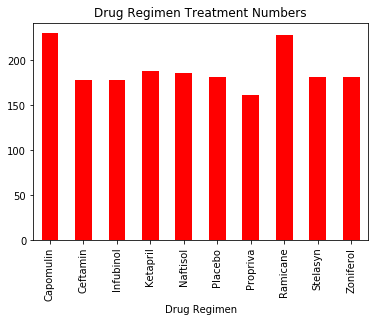

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

drug = combined_df.groupby('Drug Regimen')
drug_types = drug['Drug Regimen'].count()
drug_types

drug_types.plot(kind='bar', color = 'r', legend=False)
plt.title("Drug Regimen Treatment Numbers")

plt.show()
plt.tight_layout()


TypeError: unhashable type: 'numpy.ndarray'

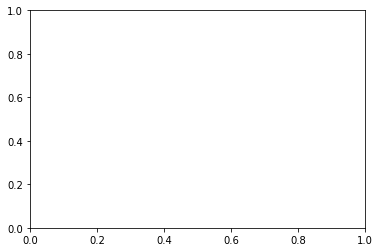

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(drug))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.bar(x_axis, drug['Drug Regimen'], color='g', width=.5)
plt.xtick(tick_locations, drug.index.values, rotation='vertical')

plt.xlim(-0.5, len(x_axis)-.25)
plt.ylim(0, max(drug['Drug Regimen'])+5)

plt.title('Drug Regimen Study Groups')
plt.xlabel('Drug Treatment')

plt.show()



## Pie plots

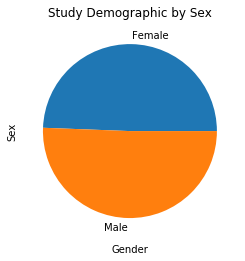

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

 # Split up our data into groups based upon 'gender'
gender_groups = combined_df.groupby('Sex')

# Find out how many of each gender
gender_disp = gender_groups['Sex'].count()

# Chart our data, give it a title, and label the axes
gender_chart = gender_disp.plot(kind="pie", title="Study Demographic by Sex")
gender_chart.set_xlabel("Gender")

plt.show()
plt.tight_layout()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

rat_study_pop = combined_df.groupby("Sex")
plt.pie(rat_study_pop, colors=['red', 'blue'],
       autopct="1.1f%%", shadow=True, startangle=90)



## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
# Grab just data for the 4 smallest mean tumor volume regimens
filtered_df = combined_df.loc[(combined_df["Drug Regimen"] == "Capomulin") | (combined_df["Drug Regimen"] == "Ramicane") | (combined_df["Drug Regimen"] == "Ceftamin") | (combined_df["Drug Regimen"] == "Propriva"), :]

# Sort by Timpepoints based on the latest values
filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')
    
# Determine quartiles
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


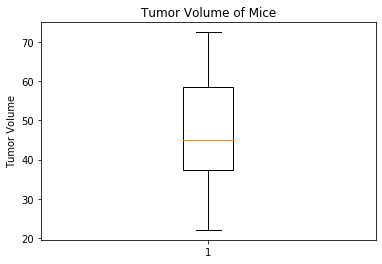

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_volume)
plt.show()

## Line and scatter plots

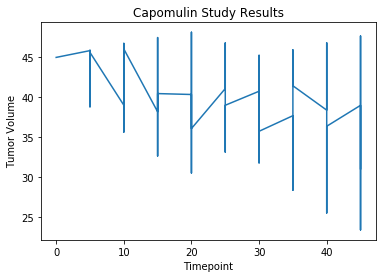

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_df = combined_df.loc[(combined_df["Drug Regimen"] == "Capomulin"),:]

# Set variables to hold relevant data
timepoint = Capomulin_df["Timepoint"]
tumor_volume = Capomulin_df["Tumor Volume (mm3)"]

# Plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Capomulin Study Results')
plt.show()


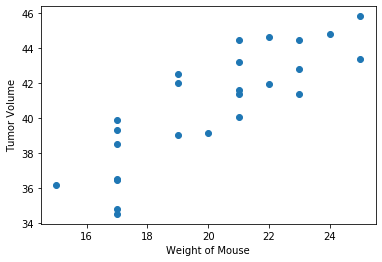

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen 

# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

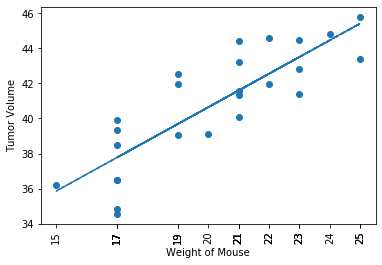

Correlation of weight and tumor value : 0.84


In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'Correlation of weight and tumor value : {corr}')